To Evaluator,
- I have tried many different algos, paths & thinkings to try and increase my kaggle public score.
- So I apologise for my .ipynb file being a bit messy
- Because to get to a specific output (eg. KNN imputation) I would run only the KNN relevant cells, along with the boiler plate cells.
- to get the result which has my highest score on kaggle you'll can run all cells from "Setup", ignore "EDA" (just exploring data), then within "Imputations" only run the one labelled **"2. Personal Method Classism"**, then finally you can run all cells for "Testing"
- using GridSearchCV was an idea given to me by a member of the discord server
- You'll have to add hacktest.csv and hacktrain.csv to the local memory of colab because i couldn't get the kaggle links to run.
Like :

 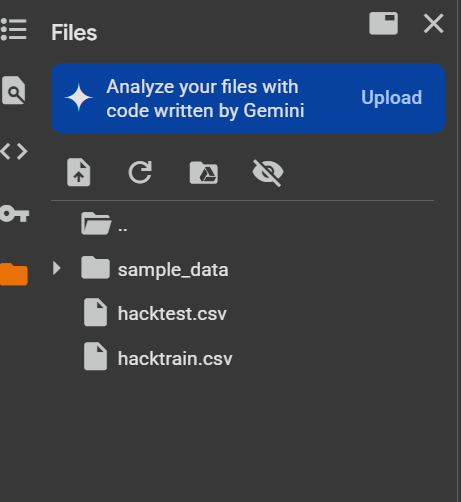

#Setup

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("hacktrain.csv")
test = pd.read_csv("hacktest.csv")

df #ignore the warnings

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [ ]:
test

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,...,801.184,927.115,4704.14,6378.42,340.949,2695.5700,527.268,4736.75,601.843,6639.760
1,1,2,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.1400,3298.110,6942.68,1070.440,842.101
2,2,3,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.9900,2206.100,6928.93,1036.560,831.441
3,3,4,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,...,959.344,5794.150,1045.57,5572.90,586.287,685.9060,1287.000,6734.72,824.584,6883.610
4,4,5,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.5200,3283.940,7937.68,1857.800,1336.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,2840,2841,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,...,-2257.890,-2582.420,-1699.10,-2295.30,306.483,209.4030,221.920,-4885.15,-2630.590,356.233
2841,2841,2842,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,...,-3991.910,-2614.910,-2109.84,-2687.18,-2853.890,71.3402,-86.414,-5109.01,324.637,-4316.580
2842,2842,2843,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,...,-2484.500,-1756.080,-3820.43,-1988.23,433.852,291.8000,254.548,-4259.30,412.115,-1170.750
2843,2843,2844,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,...,-3291.490,-2018.450,-3472.65,-3109.07,511.792,369.0970,276.948,-5574.51,298.739,460.419


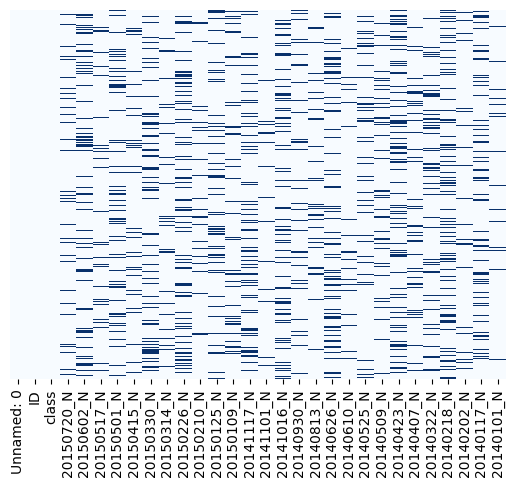

In [ ]:
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

In [ ]:
cols = df.columns
numeric_cols = cols[3:]

In [ ]:
classes = df["class"].value_counts()

In [ ]:
test.isnull().sum()

,0
Unnamed: 0,0
ID,0
20150720_N,0
20150602_N,0
20150517_N,0
20150501_N,0
20150415_N,0
20150330_N,0
20150314_N,0
20150226_N,0


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
class,0
20150720_N,560
20150602_N,1200
20150517_N,800
20150501_N,960
20150415_N,480
20150330_N,1120
20150314_N,720


In [ ]:
df['class'].value_counts()

,count
class,
forest,6159
farm,841
impervious,669
grass,196
water,105
orchard,30


In [ ]:
covers = df["class"].unique()
covers

array(['water', 'forest', 'impervious', 'farm', 'grass', 'orchard'],
      dtype=object)

# EDA


In [ ]:
import statistics

k = df.iloc[7839][3:]
l = [float(i) for i in list(k)]

median = statistics.median(l)
k.fillna(median, inplace=True)
df.iloc[7839][3:] = k.copy()
print(k)

20150720_N    5657.800
20150602_N    7244.030
20150517_N    6563.040
20150501_N    4662.710
20150415_N    5864.720
20150330_N    5657.800
20150314_N    1689.700
20150226_N    5657.800
20150210_N    5865.650
20150125_N    5916.970
20150109_N    5657.800
20141117_N    5657.800
20141101_N    5802.790
20141016_N    5347.170
20140930_N    1146.690
20140813_N     756.559
20140626_N    5640.360
20140610_N    2693.270
20140525_N    1811.100
20140509_N    5657.800
20140423_N    5657.800
20140407_N    2169.060
20140322_N    2487.360
20140218_N    5657.800
20140202_N    4354.670
20140117_N    2146.780
20140101_N    6084.580
Name: 7839, dtype: float64


<ipython-input-391-4248088254>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  k.fillna(median, inplace=True)
<ipython-input-391-4248088254>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[7839][3:] = k.copy()


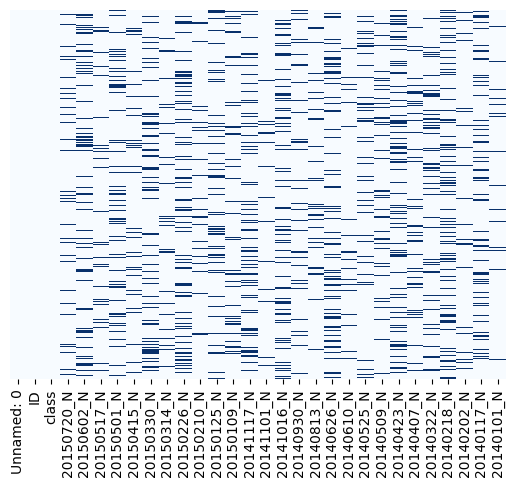

In [ ]:
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

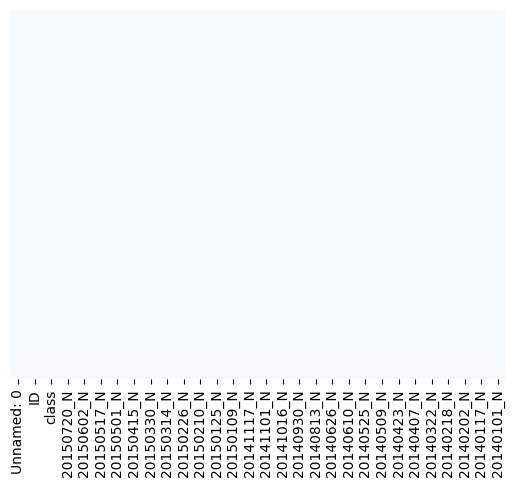

In [ ]:
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

In [ ]:
for row in range(len(k)):
    print(sum(df.iloc[row][3:]))
    break

nan


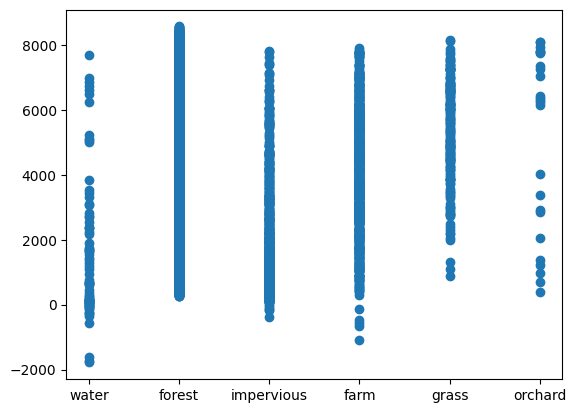

In [ ]:
#trying to view unreliable columns

plt.scatter(df['class'], df['20150602_N'], label = '2')
#plt.scatter(df['class'], df['20150720_N'], label = '1')
'''rt=0
for c in classes:
  k = df[df['class'] == c]
  for row in range(len(k)):
    plt.scatter(df.columns[3:], df.iloc[row][3:])'''

#plt.title(df.iloc[rt]['class'] + ' ' + df.iloc[rt+1]['class'])
#plt.legend()

plt.show()

# Imputations

In [ ]:
# 1. Default Method
df=df.fillna(df.median(numeric_only=True)) #simple mean imputation [This part has a lot of scope for imporovement.]
# idea 1 : divide df on basis of classes, then use mean/median to fill NULL values class wise
# idea 2 : multivariate imputation KNN or iterative
# idea 3 : todo, check idependently KNN performance, iterative performance, then implement class wise KNN or iterative, highest
# note : on testing no major outliers detected
#keep in mind that the data is inherently noisy and the test dataset is not.


df

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,1109.340,-1043.160,-1942.490,267.138,294.838,577.399,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,1197.160,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,1075.520,-1052.63,384.704,-1564.630,1012.300,...,-1025.880,368.622,1723.390,-1227.800,304.621,1033.870,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,1956.600,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,1789.080,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,3128.880,1638.970,1647.83,1935.800,2499.900,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


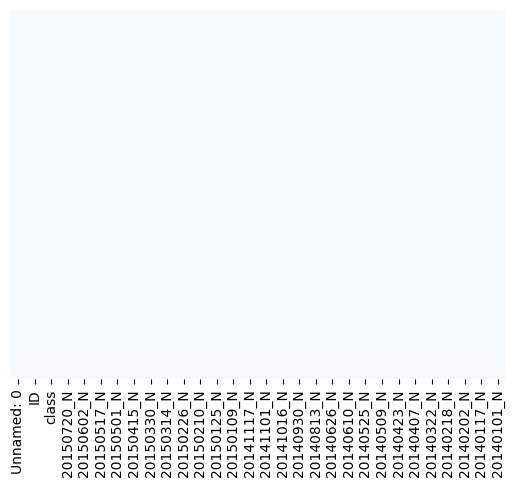

In [ ]:
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

In [ ]:
# 2. Personal Method Classism
List = []
for c in covers:
    x = df.where(df['class'] == c) #for cover in covers cover = water
    x.fillna(x.median(numeric_only=True), inplace=True)
    x = x.dropna()
    List.append(x)

df = pd.concat(List, ignore_index=True)
df

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0.0,1.0,water,637.5950,658.6680,-1882.030,-1924.360,997.904,-1739.990,630.0870,...,1537.14,-1043.160,-1942.490,267.138,804.462,746.8375,211.328,-2203.020,-1180.190,433.906
1,1.0,2.0,water,634.2400,593.7050,-1625.790,-1672.320,914.198,-692.386,707.6260,...,1537.14,-933.934,-625.385,120.059,364.858,476.9720,220.878,-2250.000,-1360.560,524.075
2,3.0,4.0,water,58.0174,-1599.1600,-154.480,-1052.630,458.498,-1564.630,765.4095,...,-1025.88,368.622,820.250,-1227.800,304.621,746.8375,369.214,-2202.120,807.871,-1343.550
3,4.0,5.0,water,72.5180,716.3735,380.436,-1256.930,515.805,-1413.180,-802.9420,...,-1813.95,155.624,820.250,-924.073,432.150,282.8330,298.320,-2197.360,807.871,-826.727
4,7.0,8.0,water,1136.4400,716.3735,-154.480,1647.830,1935.800,509.868,2158.9800,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.7200,1660.650,-116.801,-568.050,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10173.0,10174.0,orchard,7451.1800,7786.5100,2698.650,7806.230,719.551,8030.670,6034.6700,...,7656.88,6967.030,7571.110,4879.910,4748.660,2086.9850,4600.810,8363.780,1006.542,1126.140
7996,10174.0,10175.0,orchard,7233.9200,6249.1800,1152.270,6788.520,837.561,6356.880,1582.7600,...,2965.77,5846.230,6451.350,5431.240,3357.850,1492.5600,2849.630,7632.670,880.017,990.283
7997,10176.0,10177.0,orchard,7173.0400,7738.7300,4624.945,7494.860,4115.910,7095.110,1582.7600,...,2985.86,6581.040,1039.980,5308.550,6241.870,3734.3500,5696.770,7781.970,1215.050,1213.120
7998,10517.0,10518.0,orchard,7191.0900,2857.5200,1269.900,7321.345,7041.620,6356.880,591.2410,...,1212.39,5427.630,4650.390,5463.840,3347.430,6422.2400,2796.360,7071.500,6056.470,1014.390


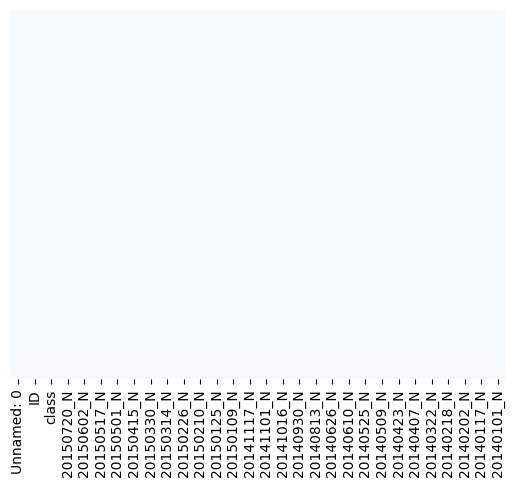

In [ ]:
# 3. KNN

knn = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)
knn[numeric_cols] = knn_imputer.fit_transform(knn[numeric_cols])
sns.heatmap(knn.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);
df = knn.copy()

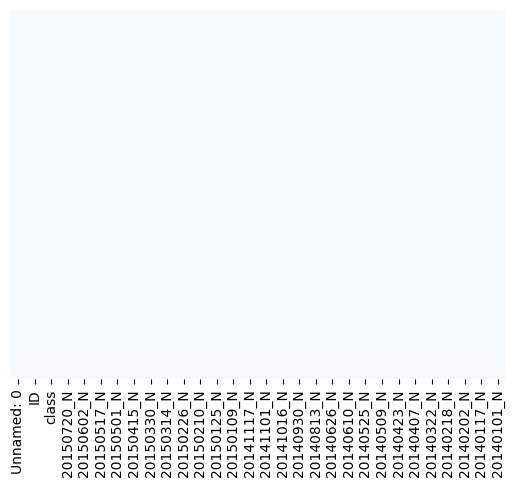

In [ ]:
# 4. iterative
df_iterative_imputer = df.copy()
itr_imputer = IterativeImputer()
df_iterative_imputer[numeric_cols] = itr_imputer.fit_transform(df_iterative_imputer[numeric_cols])
sns.heatmap(df_iterative_imputer.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);
df = df_iterative_imputer.copy()

In [ ]:
# 5. KNN Classism
List = []
for c in covers:
    k = df.where(df['class'] == c) #for cover in covers cover = water
    knn_imputer = KNNImputer(n_neighbors=5)
    k[numeric_cols] = knn_imputer.fit_transform(k[numeric_cols])
    k = k.dropna()
    List.append(k)

df = pd.concat(List, ignore_index=True)

In [ ]:
# 6. iterative classism
List = []
for c in covers:
    i = df.where(df['class'] == c) #for cover in covers cover = water
    itr_imputer = IterativeImputer()
    i[numeric_cols] = itr_imputer.fit_transform(i[numeric_cols])
    i = i.dropna()
    List.append(i)

type(List[0])

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


pandas.core.frame.DataFrame

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
class,0
20150720_N,0
20150602_N,0
20150517_N,0
20150501_N,0
20150415_N,0
20150330_N,0
20150314_N,0


# Testing

In [ ]:
#gridsearchcv

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Drop ID column
df.drop(columns=['ID'], inplace=True)

# Encode class column (if it's categorical)
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Split into features and target

# 1 & 2
X = df.drop(columns=['class'])
# 3
#X = knn.drop(columns=['class'])
# 4
#X = df_iterative_imputer.drop(columns=['class'])
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=89, stratify=y)

# Define the base model
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs'
)

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'max_iter': [100, 200, 300]
}

# Wrap model in GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',  # You can change to 'accuracy' if preferred
    n_jobs=-1,
    verbose=1
)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Use the best estimator for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Classification report with all original class labels
print("Best Parameters:", grid_search.best_params_)
print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(label_encoder.classes_))),
    target_names=label_encoder.classes_
))


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 1, 'max_iter': 200}
              precision    recall  f1-score   support

        farm       0.78      0.87      0.82       168
      forest       0.98      0.99      0.99      1232
       grass       0.78      0.46      0.58        39
  impervious       0.80      0.83      0.82       134
     orchard       0.00      0.00      0.00         6
       water       0.85      0.52      0.65        21

    accuracy                           0.94      1600
   macro avg       0.70      0.61      0.64      1600
weighted avg       0.94      0.94      0.94      1600



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
'''
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Drop ID column
df.drop(columns=['ID'], inplace=True)

# Encode class column (if it's categorical)
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Split into features and target

# 1 & 2
X = df.drop(columns=['class'])
# 3
#X = knn.drop(columns=['class'])
# 4
#X = df_iterative_imputer.drop(columns=['class'])
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=89, stratify=y)

# Fit multinomial logistic regression
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=100
)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Classification report with all original class labels
print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(label_encoder.classes_))),
    target_names=label_encoder.classes_
))
'''

"\nimport pandas as pd\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.metrics import classification_report\n\n# Drop ID column\ndf.drop(columns=['ID'], inplace=True)\n\n# Encode class column (if it's categorical)\nlabel_encoder = LabelEncoder()\ndf['class'] = label_encoder.fit_transform(df['class'])\n\n# Split into features and target\n\n# 1 & 2\nX = df.drop(columns=['class'])\n# 3\n#X = knn.drop(columns=['class'])\n# 4\n#X = df_iterative_imputer.drop(columns=['class'])\ny = df['class']\n\n# Train-test split\nX_train, X_test, y_train, y_test = train_test_split(\n    X, y, test_size=0.2, random_state=89, stratify=y)\n\n# Fit multinomial logistic regression\nmodel = LogisticRegression(\n    multi_class='multinomial',\n    solver='lbfgs',\n    max_iter=100\n)\nmodel.fit(X_train, y_train)\n\n# Predict on test set\ny_pred = model.predict(X_test)\n\n# Classification repor

In [ ]:
test_data = pd.read_csv("hacktest.csv")
test_data.shape

(2845, 29)

In [ ]:
X_test.shape

(1600, 28)

In [ ]:
ID=test_data['ID']
test_data.drop(['ID'],axis=1,inplace=True)

In [ ]:
y_test = best_model.predict(test_data)

In [ ]:
y_test

array([1, 1, 1, ..., 3, 3, 3])

In [ ]:
y_decoded = label_encoder.inverse_transform(y_test)
y_decoded

array(['forest', 'forest', 'forest', ..., 'impervious', 'impervious',
       'impervious'], dtype=object)

In [ ]:
result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})

In [ ]:
result

,ID,class
0,1,forest
1,2,forest
2,3,forest
3,4,forest
4,5,forest
...,...,...
2840,2841,impervious
2841,2842,impervious
2842,2843,impervious
2843,2844,impervious


In [ ]:
result.to_csv("final.csv", index=False) #this file will appear under the output section of the right navbar. You need to submit this csv file

In [ ]:
test.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [ ]:
df.sample(5)

,Unnamed: 0,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
5058,6173,1,7721.540000,5287.231113,6212.950000,6960.230000,7628.240,3485.26,2790.460000,7795.560,...,7570.73,1386.260,3703.472427,3134.685645,351.216,3847.00000,1377.980205,7177.482502,454.816,5874.15
4788,5859,1,7710.940000,1165.910000,433.994000,4931.040000,7910.360,7401.36,2235.690000,6167.160,...,7810.03,2217.710,8115.740000,1337.870000,259.226,2334.57000,3091.230000,7232.756854,589.834,5166.05
3424,4221,1,7873.180000,8222.320000,6071.657916,7954.200000,7635.980,5933.50,5677.120000,7968.570,...,7938.98,6912.650,1618.680000,3494.213776,7668.710,6819.32000,3879.765631,7766.090000,1360.300,2119.31
5217,6364,1,3964.900000,5480.620000,3195.721206,6205.710000,359.688,6680.36,5918.270000,707.893,...,4006.46,4340.050,430.224000,1415.090000,502.848,3347.60405,3426.850000,5416.520000,3375.690,2854.73
586,795,1,5636.025359,7919.820000,7581.340000,5387.004643,6804.910,4106.81,3638.757267,7511.730,...,5861.87,697.642,2259.610000,489.641000,6839.880,1153.89000,7398.630000,7533.690000,4350.910,1806.53


# accuracy tracking
---

1.   Default

    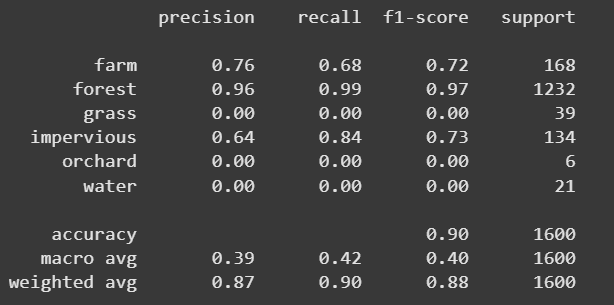

---

2.  Personal Method

    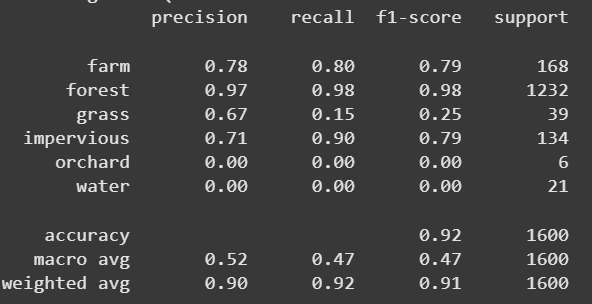



---
3. KNN

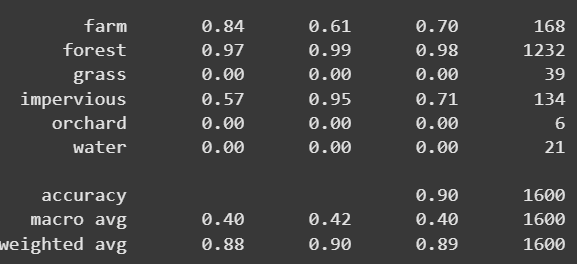

---
4. iterative

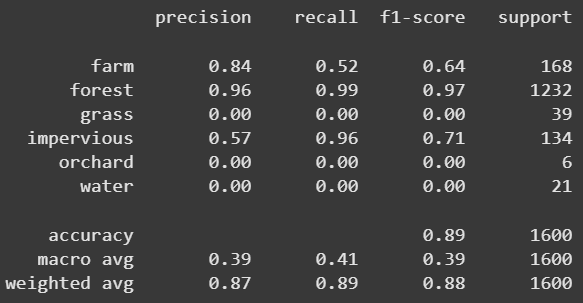

---
5. classist KNN

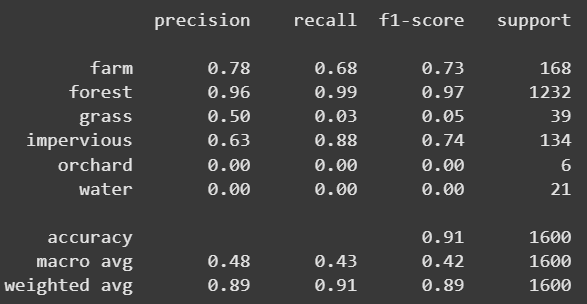

---
6. classist iteration

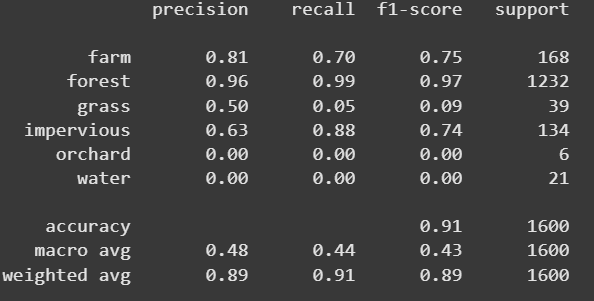
